# 結果

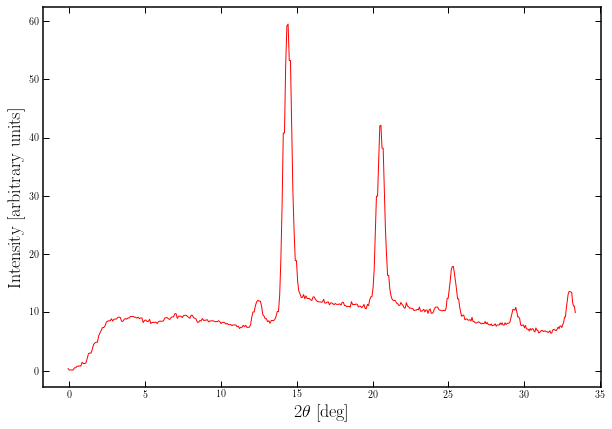

In [5]:

# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

from matplotlib import rc

rc('text', usetex=True)

# data_input
df0 = pd.read_csv('0425_06_NaCl.csv', header= 0)

angle = np.array(df0["Angle"])
intensity = np.array(df0["Intensity"])

# data plot
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

x_mean = 3.14
x_ustd = 2.27

ax1.plot(two_thita_deg[:450], intensity, "r")

ax1.set_xlabel(r"2$\theta$ [deg]", fontsize=18)
ax1.set_ylabel("Intensity [arbitrary units]", fontsize=18)

plt.savefig("NaCl_plot")
plt.show()


In [8]:
xlay_wavelengh = 0.711
lattice_constant = 5.63

num = ["111","200","220","222","400","420"]
name= ["two_theta", "distance", "value"]

theta =[paramater_optimal[i] for i in range(4,20,3)]
distance =[lattice_constant/sqrt(3), lattice_constant/sqrt(4), lattice_constant/sqrt(8),
           lattice_constant/sqrt(12), lattice_constant/sqrt(16), lattice_constant/sqrt(20)]
value =[paramater_optimal[i]**2 for i in range(2,20,3)]

df_NaCl = pd.DataFrame([theta, distance, value], index= name, columns= num)

print(df_NaCl)

                 111         200         220        222        400        420
two_theta  12.584072   14.540293   20.630895  25.354746  29.373919  32.965019
distance    3.250482    2.815000    1.990506   1.625241   1.407500   1.258906
value       2.483306  646.186757  164.468498   9.917789   1.469235   6.885137


In [ ]:
F = [paramater_optimal[i] for i in range(2,20,3)]
I = {'111': F[0]**2, '200': F[1]**2, '220': F[2]**2, '222': F[3]**2, '400': F[4]**2, '420': F[5]**2}
#I = {'111': 3.463, '200': 43.25, '220': 21.25, '222': 5.498, '400': 2.025, '420': 3.898}

points = np.arange(-1,1.01,0.01,dtype= np.complex)
dx,dy = np.meshgrid(points,points)

data = []

for dz in points:
    
    p1_r = np.exp(-2*pi*1.j*(dx+dy+dz)) +\
           np.exp(-2*pi*1.j*(dx+dy-dz)) +\
           np.exp(-2*pi*1.j*(dx-dy+dz)) +\
           np.exp(-2*pi*1.j*(-dx+dy+dz)) +\
           np.exp(-2*pi*1.j*(dx-dy-dz)) +\
           np.exp(-2*pi*1.j*(-dx+dy-dz)) +\
           np.exp(-2*pi*1.j*(-dx-dy+dz)) +\
           np.exp(-2*pi*1.j*(-dx-dy-dz))
    p1 = np.sqrt(I['111']/8)*p1_r
        
        
    p2_r = np.exp(-4*pi*1.j*dx) + np.exp(4*np.pi*1.j*dx) +\
           np.exp(-4*pi*1.j*dy) + np.exp(4*np.pi*1.j*dy) +\
           np.exp(-4*pi*1.j*dz) + np.exp(4*np.pi*1.j*dz) 
    p2 = np.sqrt(I['200']/6)*p2_r
    
    
    p3_r = np.exp(-4*pi*1.j*(dx+dy))+\
           np.exp(-4*pi*1.j*(dx+dz))+\
           np.exp(-4*pi*1.j*(dx-dy))+\
           np.exp(-4*pi*1.j*(dx-dz))+\
           np.exp(-4*pi*1.j*(-dx+dy))+\
           np.exp(-4*pi*1.j*(-dx+dz))+\
           np.exp(-4*pi*1.j*(-dx-dy))+\
           np.exp(-4*pi*1.j*(-dx-dz))+\
           np.exp(-4*pi*1.j*(dy+dz))+\
           np.exp(-4*pi*1.j*(-dy+dz))+\
           np.exp(-4*pi*1.j*(dy-dz))+\
           np.exp(-4*pi*1.j*(-dy+dz))
           
    p3 = np.sqrt(I['220']/12)*p3_r
    
    p4_r = np.exp(-4*pi*1.j*(dx+dy+dz))+\
           np.exp(-4*pi*1.j*(dx+dy-dz))+\
           np.exp(-4*pi*1.j*(dx-dy+dz))+\
           np.exp(-4*pi*1.j*(-dx+dy+dz))+\
           np.exp(-4*pi*1.j*(dx-dy-dz))+\
           np.exp(-4*pi*1.j*(-dx+dy-dz))+\
           np.exp(-4*pi*1.j*(-dx-dy+dz))+\
           np.exp(-4*pi*1.j*(-dx-dy-dz)) 

    p4 = np.sqrt(I['222']/8)*p4_r
    

    
    p5_r = np.exp(-8*pi*1.j*dx) + np.exp(8*np.pi*1.j*dx) +\
           np.exp(-8*pi*1.j*dy) + np.exp(8*np.pi*1.j*dy) +\
           np.exp(-8*pi*1.j*dz) + np.exp(8*np.pi*1.j*dz) 
    p5 = np.sqrt(I['400']/6)*p5_r
    
    
    p6_r = np.exp(-4*pi*1.j*(2*dx+dy))+\
           np.exp(-4*pi*1.j*(2*dx+dz))+\
           np.exp(-4*pi*1.j*(2*dx-dy))+\
           np.exp(-4*pi*1.j*(2*dx-dz))+\
           np.exp(-4*pi*1.j*(dx+2*dy))+\
           np.exp(-4*pi*1.j*(dx+2*dz))+\
           np.exp(-4*pi*1.j*(dx-2*dy))+\
           np.exp(-4*pi*1.j*(dx-2*dz))+\
           np.exp(-4*pi*1.j*(dy+2*dz))+\
           np.exp(-4*pi*1.j*(dy-2*dz))+\
           np.exp(-4*pi*1.j*(-dy+2*dz))+\
           np.exp(-4*pi*1.j*(-dy-2*dz))+\
           np.exp(-4*pi*1.j*(2*dy+dz))+\
           np.exp(-4*pi*1.j*(2*dy-dz))+\
           np.exp(-4*pi*1.j*(-2*dy+dz))+\
           np.exp(-4*pi*1.j*(-2*dy-dz))
    
    p6 = np.sqrt(I['420']/12)*p6_r

    
    p = p1 + p2 + p3 + p4 + p5 + p6
    
    
    data.append(p)

-1=< z =< 1 : 0


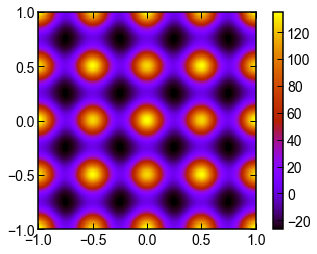

In [8]:
number = int(float(input("-1=< z =< 1 : "))*100+100)
plt.imshow(np.real(data[number]), cmap="gnuplot",extent=[-1,1,-1,1])

plt.colorbar()
plt.savefig("NaCl_im00")

-1=< z =< 1 : 0.5


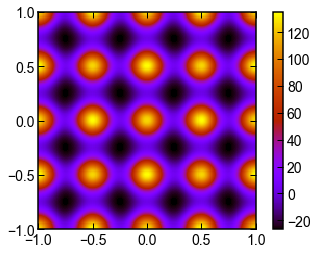

In [9]:
number = int(float(input("-1=< z =< 1 : "))*100+100)
plt.imshow(np.real(data[number]), cmap="gnuplot",extent=[-1,1,-1,1])

plt.colorbar()
plt.savefig("NaCl_im05")

# 完成版 (fitting)

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

degree is : 7.255127461342393
alpha  is : 0.00735251551808375
[ 2.60587482  0.24806176 12.55341385 35.68773641  0.281273   14.49958275
 24.13340532  0.2996762  20.61882348  7.34241393  0.33752406 25.3534991
  1.24131827  0.17822983 29.44474484  2.97888138  0.20389214 33.1015278 ]


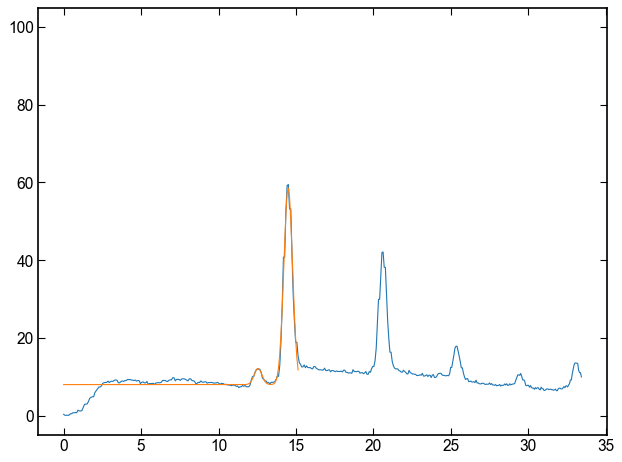

In [3]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

# data_input
df0 = pd.read_csv('0425_06_NaCl.csv', header= 0)

angle = np.array(df0["Angle"])
intensity = np.array(df0["Intensity"])

#[35.2, 59.49]
distance = 5.63/2
rad = asin(0.711/(2*distance))
deg = degrees(rad)
print("degree is : " + str(deg))

alpha = tan(2*rad)/35.2
print("alpha  is : "+ str(alpha))

two_thita_deg = [degrees(atan(alpha*ang)) for ang in angle]


# function_define

def gauss(x, a, sigma, mean):
    return a / np.sqrt(2.0*np.pi) / sigma * np.exp(-((x-mean)/sigma)**2/2)


def fitting(x, *paramaters):
    a1, sigma1, mean1, a2, sigma2, mean2, a3, sigma3, mean3, a4, sigma4, mean4, a5, sigma5, mean5, a6, sigma6, mean6  = paramaters
    return gauss(x, a1, sigma1, mean1) + \
           gauss(x, a2, sigma2, mean2) + \
           gauss(x, a3, sigma3, mean3) + \
           gauss(x, a4, sigma4, mean4) + \
           gauss(x, a5, sigma5, mean5) + \
           gauss(x, a6, sigma6, mean6) + 8
        
# initial         
initial_gauss1 = 2.60587478,  0.24806175, 12.55341385 #a1, sigma1, mean1
initial_gauss2 = 32.12624409, 0.26151443, 14.49595295 #a2, sigma2, mean2
initial_gauss3 = 18.65372096, 0.24795276, 20.62008517 #a3, sigma3, mean3
initial_gauss4 = 5.00578413,  0.23956014, 25.37221518
initial_gauss5 = 1.24131827,  0.17822983, 29.44474484
initial_gauss6 = 2.97881366, 0.20388317, 33.10153195

initial_parameter = initial_gauss1 + initial_gauss2 + initial_gauss3 + \
                    initial_gauss4 + initial_gauss5 + initial_gauss6

# action
zero=0
st=60
one=185
end=450

paramater_optimal, covariance = curve_fit(fitting, two_thita_deg[st:end], intensity[st:end], initial_parameter)

print(paramater_optimal)


#matplotlibの設定
plt.rc('font', family='Arial', size=14) #フォントの設定
plt.rc('xtick.major', width=1, size=6) #x軸の主目盛りの設定
plt.rc('xtick', direction='in', top=True) #x軸目盛りの向き、上側に表示するか
plt.rc('ytick.major', width=1, size=6) #y軸の主目盛りの設定
plt.rc('ytick', direction='in', right=True) #y軸目盛りの向き、右側に表示するか
plt.rc('axes', linewidth=1.5) #枠線の太さ
plt.rc('lines', linewidth=1.0) #プロットの太さ

#今回は、Axes が一つしかないので fig, ax1 = plt.subplots() の方が簡素。
#慣例として ax1 を用いるが、df 同様に意味のある変数名にすべき。
fig = plt.figure(figsize=(8, 6), dpi=80)
gs = gridspec.GridSpec(1, 1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(two_thita_deg, intensity)
ax1.yaxis.set_data_interval(0, 100)


ax1.plot(two_thita_deg[zero:one], fitting(two_thita_deg[zero:one], *paramater_optimal))
fig.tight_layout() #グラフ描画前に行うべし。慣例では、fig.tight_layout()
plt.show()





degree is : 7.255127461342393
alpha  is : 0.00735251551808375
[ 2.60587482  0.24806176 12.55341385 35.68773641  0.281273   14.49958275
 24.13340532  0.2996762  20.61882348  7.34241393  0.33752406 25.3534991
  1.24131827  0.17822983 29.44474484  2.97888138  0.20389214 33.1015278 ]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


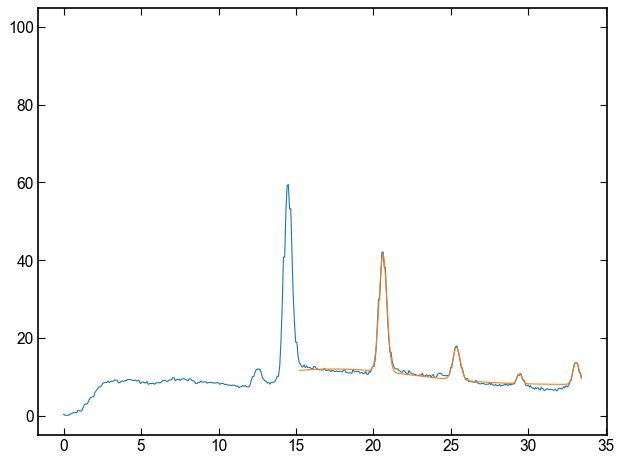

In [4]:

# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

# data_input
df0 = pd.read_csv('0425_06_NaCl.csv', header= 0)

angle = np.array(df0["Angle"])
intensity = np.array(df0["Intensity"])

#[35.2, 59.49]
distance = 5.63/2
rad = asin(0.711/(2*distance))
deg = degrees(rad)
print("degree is : " + str(deg))

alpha = tan(2*rad)/35.2
print("alpha  is : "+ str(alpha))

two_thita_deg = [degrees(atan(alpha*ang)) for ang in angle]


# function_define
def linear(x, a, b):
    return b*(a + x)
    
def gauss(x, a, sigma, mean):
    return a / np.sqrt(2.0*np.pi) / sigma * np.exp(-((x-mean)/sigma)**2/2)


def fitting2(x, *paramaters):
    a0, b0, a3, sigma3, mean3, a4, sigma4, mean4, a5, sigma5, mean5, a6, sigma6, mean6  = paramaters
    return linear(x, a0, b0) + \
           gauss(x, a3, sigma3, mean3) + \
           gauss(x, a4, sigma4, mean4) + \
           gauss(x, a5, sigma5, mean5) + \
           gauss(x, a6, sigma6, mean6) 
        
# initial
initial_gauss0 =  -30., -1.,
#initial_gauss1 = 2.60587478,  0.24806175, 12.55341385 #a1, sigma1, mean1
#initial_gauss2 = 32.12624409, 0.26151443, 14.49595295 #a2, sigma2, mean2
initial_gauss3 = 18.65372096, 0.24795276, 20.62008517 #a3, sigma3, mean3
initial_gauss4 = 5.00578413,  0.23956014, 25.37221518
initial_gauss5 = 1.24131827,  0.17822983, 29.44474484
initial_gauss6 = 2.97881366, 0.20388317, 33.10153195

initial_parameter_2 = initial_gauss0 + initial_gauss3 + \
                    initial_gauss4 + initial_gauss5 + initial_gauss6
#+ initial_gauss1
# action

one = 185
end= 450

paramater_optimal_2, covariance = curve_fit(fitting, two_thita_deg[one:end], intensity[one:end], initial_parameter)

print(paramater_optimal)


#matplotlibの設定
plt.rc('font', family='Arial', size=14) #フォントの設定
plt.rc('xtick.major', width=1, size=6) #x軸の主目盛りの設定
plt.rc('xtick', direction='in', top=True) #x軸目盛りの向き、上側に表示するか
plt.rc('ytick.major', width=1, size=6) #y軸の主目盛りの設定
plt.rc('ytick', direction='in', right=True) #y軸目盛りの向き、右側に表示するか
plt.rc('axes', linewidth=1.5) #枠線の太さ
plt.rc('lines', linewidth=1.0) #プロットの太さ

#今回は、Axes が一つしかないので fig, ax1 = plt.subplots() の方が簡素。
#慣例として ax1 を用いるが、df 同様に意味のある変数名にすべき。
fig = plt.figure(figsize=(8, 6), dpi=80)
gs = gridspec.GridSpec(1, 1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(two_thita_deg, intensity)
ax1.yaxis.set_data_interval(0, 100)


ax1.plot(two_thita_deg[one:end], fitting(two_thita_deg[one:end], *paramater_optimal_2))
fig.tight_layout() #グラフ描画前に行うべし。慣例では、fig.tight_layout()
plt.show()



# 完成版(NaCl)

degree is : 7.255127461342393
alpha  is : 0.00735251551808375
[-54.68074214  -0.17627334   1.57585096   0.18919297  12.58407238
  25.42020372   0.2292283   14.54029282  12.8245272    0.24038848
  20.63089452   3.14925217   0.22667062  25.35474558   1.21211987
   0.23797558  29.37391919   2.6239545    0.24638086  32.9650186 ]


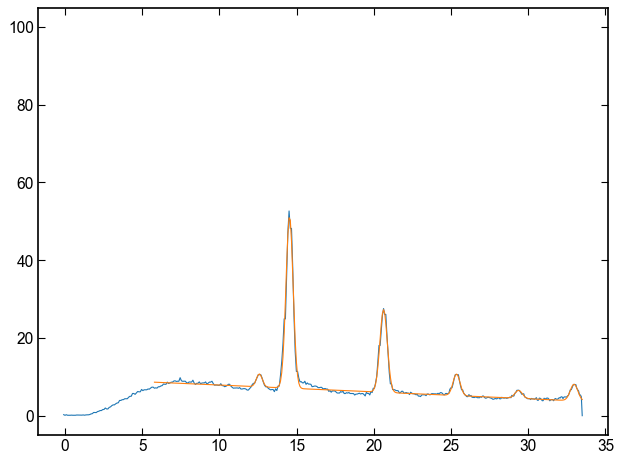

In [2]:

# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

# data_input
df0 = pd.read_csv('0425_07_NaCl.csv', header= 0)

angle_r = np.array(df0["Angle"])
angle = angle_r[::-1]*(-1)
intensity_r = np.array(df0["Intensity"])
intensity = intensity_r[::-1]

#[35.2, 59.49]
distance = 5.63/2
rad = asin(0.711/(2*distance))
deg = degrees(rad)
print("degree is : " + str(deg))

alpha = tan(2*rad)/35.2
print("alpha  is : "+ str(alpha))

two_thita_deg = [degrees(atan(alpha*ang)) for ang in angle]


# function_define
def linear(x, a, b):
    return b*(a + x)
    
def gauss(x, a, sigma, mean):
    return a / np.sqrt(2.0*np.pi) / sigma * np.exp(-((x-mean)/sigma)**2/2)


def fitting(x, *paramaters):
    a0, b0, a1, sigma1, mean1, a2, sigma2, mean2, a3, sigma3, mean3, a4, sigma4, mean4, a5, sigma5, mean5, a6, sigma6, mean6  = paramaters
    return linear(x, a0, b0) + \
           gauss(x, a1, sigma1, mean1) + \
           gauss(x, a2, sigma2, mean2) + \
           gauss(x, a3, sigma3, mean3) + \
           gauss(x, a4, sigma4, mean4) + \
           gauss(x, a5, sigma5, mean5) + \
           gauss(x, a6, sigma6, mean6) 
        
# initial
initial_gauss0 =  -30., -1.,
initial_gauss1 = 2.60587478,  0.24806175, 12.55341385 #a1, sigma1, mean1
initial_gauss2 = 32.12624409, 0.26151443, 14.49595295 #a2, sigma2, mean2
initial_gauss3 = 18.65372096, 0.24795276, 20.62008517 #a3, sigma3, mean3
initial_gauss4 = 5.00578413,  0.23956014, 25.37221518
initial_gauss5 = 2.,  0.2, 29.
initial_gauss6 = 2.33902937,  0.22952653, 32.97021728

initial_parameter = initial_gauss0 + initial_gauss1 + initial_gauss2 + initial_gauss3 + \
                    initial_gauss4 + initial_gauss5 + initial_gauss6
# action

one = 70
end= 453

paramater_optimal, covariance = curve_fit(fitting, two_thita_deg[one:], intensity[one:], initial_parameter)
print(paramater_optimal)


#matplotlibの設定
plt.rc('font', family='Arial', size=14) #フォントの設定
plt.rc('xtick.major', width=1, size=6) #x軸の主目盛りの設定
plt.rc('xtick', direction='in', top=True) #x軸目盛りの向き、上側に表示するか
plt.rc('ytick.major', width=1, size=6) #y軸の主目盛りの設定
plt.rc('ytick', direction='in', right=True) #y軸目盛りの向き、右側に表示するか
plt.rc('axes', linewidth=1.5) #枠線の太さ
plt.rc('lines', linewidth=1.0) #プロットの太さ

#今回は、Axes が一つしかないので fig, ax1 = plt.subplots() の方が簡素。
#慣例として ax1 を用いるが、df 同様に意味のある変数名にすべき。
fig = plt.figure(figsize=(8, 6), dpi=80)
gs = gridspec.GridSpec(1, 1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(two_thita_deg, intensity)
ax1.yaxis.set_data_interval(0, 100)


ax1.plot(two_thita_deg[one:], fitting(two_thita_deg[one:], *paramater_optimal))
fig.tight_layout() #グラフ描画前に行うべし。慣例では、fig.tight_layout()
plt.show()



# 積分強度

In [3]:
from scipy import integrate


result = []
def gauss(x, a, sigma, mean):
    return a / np.sqrt(2.0*np.pi) / sigma * np.exp(-((x-mean)/sigma)**2/2)

value = []
for i in range(2,20,3):
    value.append(paramater_optimal[i])
    hoge, error = integrate.quad(lambda x:gauss(x,paramater_optimal[i],+ \
                               paramater_optimal[i+1] ,paramater_optimal[i+2]),0,40)
    result.append(hoge)

print(value)
print(result)

[1.5758509628902868, 25.42020372038641, 12.82452720442457, 3.1492521674786564, 1.2121198650435743, 2.623954498306426]
[1.575850962890287, 25.42020372038641, 12.824527204424578, 3.1492521674786556, 1.212119865043575, 2.623954498306417]


# 完成版(NaCl)


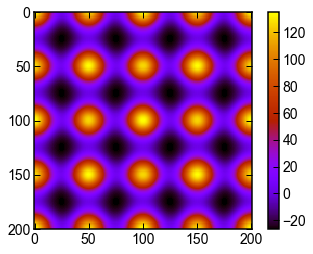

In [4]:
F = [paramater_optimal[i] for i in range(2,20,3)]
I = {'111': F[0]**2, '200': F[1]**2, '220': F[2]**2, '222': F[3]**2, '400': F[4]**2, '420': F[5]**2}
#I = {'111': 3.463, '200': 43.25, '220': 21.25, '222': 5.498, '400': 2.025, '420': 3.898}

points = np.arange(-1,1.01,0.01,dtype= np.complex)
dx,dy = np.meshgrid(points,points)

data = []

for dz in points:
    
    p1_r = np.exp(-2*pi*1.j*(dx+dy+dz)) +\
           np.exp(-2*pi*1.j*(dx+dy-dz)) +\
           np.exp(-2*pi*1.j*(dx-dy+dz)) +\
           np.exp(-2*pi*1.j*(-dx+dy+dz)) +\
           np.exp(-2*pi*1.j*(dx-dy-dz)) +\
           np.exp(-2*pi*1.j*(-dx+dy-dz)) +\
           np.exp(-2*pi*1.j*(-dx-dy+dz)) +\
           np.exp(-2*pi*1.j*(-dx-dy-dz))
    p1 = np.sqrt(I['111']/8)*p1_r
        
        
    p2_r = np.exp(-4*pi*1.j*dx) + np.exp(4*np.pi*1.j*dx) +\
           np.exp(-4*pi*1.j*dy) + np.exp(4*np.pi*1.j*dy) +\
           np.exp(-4*pi*1.j*dz) + np.exp(4*np.pi*1.j*dz) 
    p2 = np.sqrt(I['200']/6)*p2_r
    
    
    p3_r = np.exp(-4*pi*1.j*(dx+dy))+\
           np.exp(-4*pi*1.j*(dx+dz))+\
           np.exp(-4*pi*1.j*(dx-dy))+\
           np.exp(-4*pi*1.j*(dx-dz))+\
           np.exp(-4*pi*1.j*(-dx+dy))+\
           np.exp(-4*pi*1.j*(-dx+dz))+\
           np.exp(-4*pi*1.j*(-dx-dy))+\
           np.exp(-4*pi*1.j*(-dx-dz))+\
           np.exp(-4*pi*1.j*(dy+dz))+\
           np.exp(-4*pi*1.j*(-dy+dz))+\
           np.exp(-4*pi*1.j*(dy-dz))+\
           np.exp(-4*pi*1.j*(-dy+dz))
           
    p3 = np.sqrt(I['220']/12)*p3_r
    
    p4_r = np.exp(-4*pi*1.j*(dx+dy+dz))+\
           np.exp(-4*pi*1.j*(dx+dy-dz))+\
           np.exp(-4*pi*1.j*(dx-dy+dz))+\
           np.exp(-4*pi*1.j*(-dx+dy+dz))+\
           np.exp(-4*pi*1.j*(dx-dy-dz))+\
           np.exp(-4*pi*1.j*(-dx+dy-dz))+\
           np.exp(-4*pi*1.j*(-dx-dy+dz))+\
           np.exp(-4*pi*1.j*(-dx-dy-dz)) 

    p4 = np.sqrt(I['222']/8)*p4_r
    

    
    p5_r = np.exp(-8*pi*1.j*dx) + np.exp(8*np.pi*1.j*dx) +\
           np.exp(-8*pi*1.j*dy) + np.exp(8*np.pi*1.j*dy) +\
           np.exp(-8*pi*1.j*dz) + np.exp(8*np.pi*1.j*dz) 
    p5 = np.sqrt(I['400']/6)*p5_r
    
    
    p6_r = np.exp(-4*pi*1.j*(2*dx+dy))+\
           np.exp(-4*pi*1.j*(2*dx+dz))+\
           np.exp(-4*pi*1.j*(2*dx-dy))+\
           np.exp(-4*pi*1.j*(2*dx-dz))+\
           np.exp(-4*pi*1.j*(dx+2*dy))+\
           np.exp(-4*pi*1.j*(dx+2*dz))+\
           np.exp(-4*pi*1.j*(dx-2*dy))+\
           np.exp(-4*pi*1.j*(dx-2*dz))+\
           np.exp(-4*pi*1.j*(dy+2*dz))+\
           np.exp(-4*pi*1.j*(dy-2*dz))+\
           np.exp(-4*pi*1.j*(-dy+2*dz))+\
           np.exp(-4*pi*1.j*(-dy-2*dz))+\
           np.exp(-4*pi*1.j*(2*dy+dz))+\
           np.exp(-4*pi*1.j*(2*dy-dz))+\
           np.exp(-4*pi*1.j*(-2*dy+dz))+\
           np.exp(-4*pi*1.j*(-2*dy-dz))
    
    p6 = np.sqrt(I['420']/12)*p6_r

    
    p = p1 + p2 + p3 + p4 + p5 + p6
    
    
    data.append(p)

plt.imshow(np.real(data[0]), cmap="gnuplot")
plt.colorbar()


-1=< z =< 1 : 0


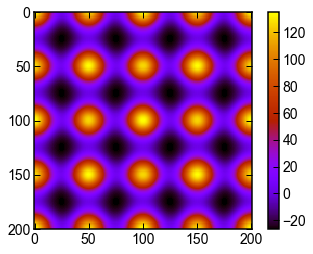

In [6]:
number = int(float(input("-1=< z =< 1 : "))*100+100)
plt.imshow(np.real(data[number]), cmap="gnuplot")

plt.colorbar()

-1=< z =< 1 : 0.5


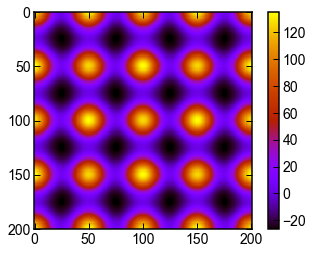

In [7]:
number = int(float(input("-1=< z =< 1 : "))*100+100)
plt.imshow(np.real(data[number]), cmap="gnuplot")
plt.colorbar()

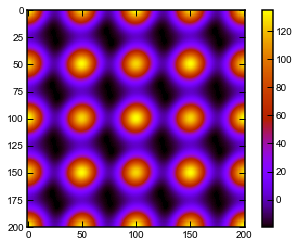

In [47]:
plt.imshow(np.real(p), cmap="gnuplot")
plt.colorbar()


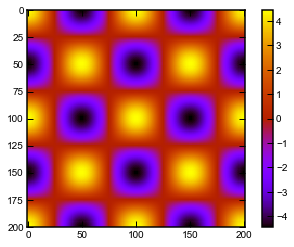

In [48]:
plt.imshow(np.real(p1),cmap="gnuplot")
plt.colorbar()

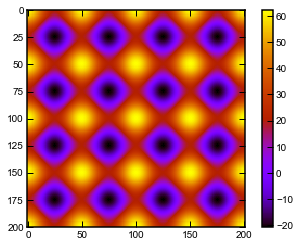

In [49]:
plt.imshow(np.real(p2),cmap="gnuplot")
plt.colorbar()

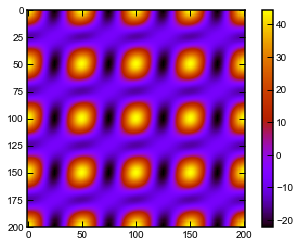

In [50]:
plt.imshow(np.real(p3),cmap="gnuplot")
plt.colorbar()

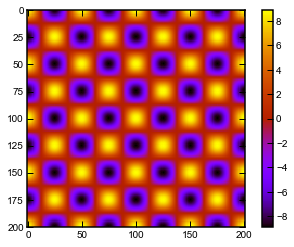

In [51]:
plt.imshow(np.real(p4),cmap="gnuplot")
plt.colorbar()

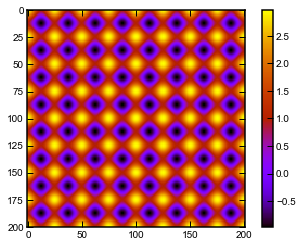

In [52]:
plt.imshow(np.real(p5),cmap="gnuplot")
plt.colorbar()

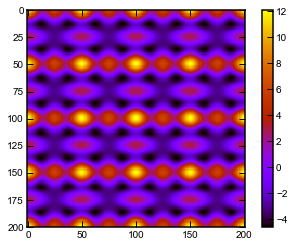

In [53]:
plt.imshow(np.real(p6),cmap="gnuplot")
plt.colorbar()